In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("co_properties.csv")
data.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [3]:
data

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,...,7.0,NaN,NaN,1.300000e+09,COP,NaN,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,NaN,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,Mensual,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,...,8.0,NaN,NaN,3.500000e+09,COP,NaN,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,...,9.0,NaN,NaN,4.800000e+08,COP,NaN,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999997,NEIrzJXLpHqPDIXwD+9r8w==,Propiedad,2021-03-31,2021-05-07,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,7.000000e+05,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999998,fpxqXlGPqDwKhuZVQGxCPA==,Propiedad,2021-03-31,9999-12-31,2021-03-31,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,...,4.0,NaN,NaN,7.000000e+08,COP,NaN,Casa en venta La Castellana,<b>Casa en venta La Castellana</b><br><br>Herm...,Casa,Venta


In [4]:
"""
Id : Id of property
l1 : Country
l2 : Department
l3 : City
l4 : Zone
l5 : Locality
l6 : Neighborhood
'ad_type':Property, 
'start_date'
'end_date'
'created_on'
'lat'
'lon'
'rooms'
'bedrooms'
'bathrooms',
'surface_total'
'surface_covered'
'price':price
'currency':type of money
'price_period':the period of proce
'title':name 
'description'
'property_type':Apartment,house, farm, etc
'operation_type':Sale, Rent, etc
"""

"\nId : Id of property\nl1 : Country\nl2 : Department\nl3 : City\nl4 : Zone\nl5 : Locality\nl6 : Neighborhood\n'ad_type':Property, \n'start_date'\n'end_date'\n'created_on'\n'lat'\n'lon'\n'rooms'\n'bedrooms'\n'bathrooms',\n'surface_total'\n'surface_covered'\n'price':price\n'currency':type of money\n'price_period':the period of proce\n'title':name \n'description'\n'property_type':Apartment,house, farm, etc\n'operation_type':Sale, Rent, etc\n"

#### Checking the property type

In [5]:
data["property_type"].value_counts()

Apartamento        565404
Casa               220101
Otro               111046
Lote                46369
Local comercial     26389
Oficina             22258
Finca                6725
Depósito             1544
Parqueadero           164
Name: property_type, dtype: int64

#### Apartaments

In [6]:
apartments=data[data["property_type"]=="Apartamento"]
null_values=apartments.isnull().sum()/len(apartments)*100
print(null_values.sort_values())
percetage_50=[]
for column in null_values.index:
    if null_values[column]>50:
        percetage_50.append(column)
apartments=apartments.drop(columns=percetage_50)
apartments= apartments.dropna(how='any')
apartments

id                  0.000000
property_type       0.000000
l2                  0.000000
l1                  0.000000
operation_type      0.000000
end_date            0.000000
start_date          0.000000
ad_type             0.000000
created_on          0.000000
title               0.000531
price               0.039618
currency            0.043686
description         0.055712
l3                  3.999972
bathrooms          13.003445
lat                30.082560
lon                30.082560
bedrooms           57.753571
l4                 68.504821
rooms              79.403931
l5                 82.429378
price_period       89.249811
l6                 93.147378
surface_covered    93.938847
surface_total      96.458285
dtype: float64


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
3326,SpT+hcNb3UQKQiqxW1Ligw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.328000,-76.639000,Colombia,Valle del Cauca,Cali,7.0,980000000.0,COP,"HERMOSO PENTHOUSE EN VENTA, SECTOR PANCE","HERMOSO APARTAMENTO TIPO PENT HOUSE, CON UNA L...",Apartamento,Venta
3552,Gz4dnC8SncBA0th/LCzATQ==,Propiedad,2020-10-07,2020-10-14,2020-10-07,3.449279,-76.495346,Colombia,Valle del Cauca,Cali,1.0,97000000.0,COP,VENTA APARTAMENTO LA BASE,"APARTAMENTO TERCER PISO, UBICADO ZONA NORTE, c...",Apartamento,Venta
3555,4JrUxU9MrPzxGss7uDNALw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.387000,-76.542000,Colombia,Valle del Cauca,Cali,1.0,135000000.0,COP,APARTAMENTO BARRIO SANTA ANITA,APARTAMENTO UBICADO SOBRE LA AUTOPISTA CON GUA...,Apartamento,Venta
3556,oC+59V7yoIfhdH89xyN4kA==,Propiedad,2020-10-07,2020-10-10,2020-10-07,3.399000,-76.529000,Colombia,Valle del Cauca,Cali,1.0,138000000.0,COP,APARTAMENTO BLOQUES DEL LIMONAR,APARTAMENTO REMODELADO CUARTO PISO SIN ASCENSO...,Apartamento,Venta
3557,TjWZarsWuZSz/HkbGpNJYQ==,Propiedad,2020-10-07,2020-12-11,2020-10-07,3.475931,-76.518803,Colombia,Valle del Cauca,Cali,1.0,720000.0,COP,ARRIENDO APARTAESTUDIO LA FLORA,"APARTAESTUDIO EN EDIFICIO CON PARQUEADERO, ubi...",Apartamento,Arriendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,2dTHgLrpas4IYRHxffvu5Q==,Propiedad,2021-03-31,9999-12-31,2021-03-31,4.640417,-74.155487,Colombia,Cundinamarca,Bogotá D.C,1.0,800000.0,COP,TORRES DE CASTELLO,<b>TORRES DE CASTELLO</b><br><br>APARTAMENTO S...,Apartamento,Arriendo
999994,WuCAZxlgtkYgoHRAiodCbA==,Propiedad,2021-03-31,2021-09-03,2021-03-31,4.641292,-74.153875,Colombia,Cundinamarca,Bogotá D.C,2.0,350000000.0,COP,Apartamenton venta Zapan de castilla _ wasi362...,Apartamento en piso 6 con amplia iluminación n...,Apartamento,Venta
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo


In [7]:
apartments["created_on"].value_counts()

2021-02-16    5484
2020-07-27    3943
2020-09-25    3812
2021-02-15    3449
2020-08-27    3042
              ... 
2021-06-20      38
2021-07-05      37
2021-07-18      35
2021-07-04      30
2021-06-13      30
Name: created_on, Length: 371, dtype: int64

In [8]:
apartments["operation_type"].value_counts()

Venta                163760
Arriendo             151257
Arriendo temporal       130
Name: operation_type, dtype: int64

In [9]:
apartments["currency"].value_counts()

COP    315141
USD         3
ARS         3
Name: currency, dtype: int64

In [10]:
apartments=apartments[apartments["currency"]=="COP"]
apartments

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
3326,SpT+hcNb3UQKQiqxW1Ligw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.328000,-76.639000,Colombia,Valle del Cauca,Cali,7.0,980000000.0,COP,"HERMOSO PENTHOUSE EN VENTA, SECTOR PANCE","HERMOSO APARTAMENTO TIPO PENT HOUSE, CON UNA L...",Apartamento,Venta
3552,Gz4dnC8SncBA0th/LCzATQ==,Propiedad,2020-10-07,2020-10-14,2020-10-07,3.449279,-76.495346,Colombia,Valle del Cauca,Cali,1.0,97000000.0,COP,VENTA APARTAMENTO LA BASE,"APARTAMENTO TERCER PISO, UBICADO ZONA NORTE, c...",Apartamento,Venta
3555,4JrUxU9MrPzxGss7uDNALw==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.387000,-76.542000,Colombia,Valle del Cauca,Cali,1.0,135000000.0,COP,APARTAMENTO BARRIO SANTA ANITA,APARTAMENTO UBICADO SOBRE LA AUTOPISTA CON GUA...,Apartamento,Venta
3556,oC+59V7yoIfhdH89xyN4kA==,Propiedad,2020-10-07,2020-10-10,2020-10-07,3.399000,-76.529000,Colombia,Valle del Cauca,Cali,1.0,138000000.0,COP,APARTAMENTO BLOQUES DEL LIMONAR,APARTAMENTO REMODELADO CUARTO PISO SIN ASCENSO...,Apartamento,Venta
3557,TjWZarsWuZSz/HkbGpNJYQ==,Propiedad,2020-10-07,2020-12-11,2020-10-07,3.475931,-76.518803,Colombia,Valle del Cauca,Cali,1.0,720000.0,COP,ARRIENDO APARTAESTUDIO LA FLORA,"APARTAESTUDIO EN EDIFICIO CON PARQUEADERO, ubi...",Apartamento,Arriendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,2dTHgLrpas4IYRHxffvu5Q==,Propiedad,2021-03-31,9999-12-31,2021-03-31,4.640417,-74.155487,Colombia,Cundinamarca,Bogotá D.C,1.0,800000.0,COP,TORRES DE CASTELLO,<b>TORRES DE CASTELLO</b><br><br>APARTAMENTO S...,Apartamento,Arriendo
999994,WuCAZxlgtkYgoHRAiodCbA==,Propiedad,2021-03-31,2021-09-03,2021-03-31,4.641292,-74.153875,Colombia,Cundinamarca,Bogotá D.C,2.0,350000000.0,COP,Apartamenton venta Zapan de castilla _ wasi362...,Apartamento en piso 6 con amplia iluminación n...,Apartamento,Venta
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,700000.0,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo


In [11]:
cities=apartments["l3"].value_counts()[:10].index.to_list()
cities

['Bogotá D.C',
 'Medellín',
 'Cali',
 'Barranquilla',
 'Manizales',
 'Bucaramanga',
 'Envigado',
 'Floridablanca',
 'Sabaneta',
 'Cúcuta']

In [12]:
apartments = apartments[apartments["l3"].isin(apartments["l3"].value_counts()[:10].index)]
sales_data=apartments[apartments["operation_type"]=="Venta"]
rent_data=apartments[apartments["operation_type"]=="Arriendo"]

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

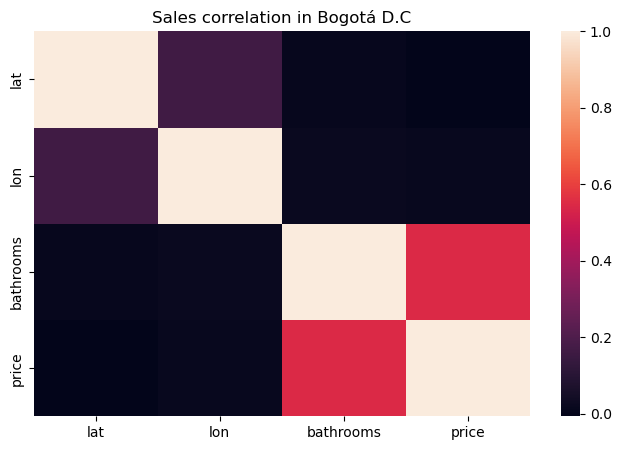

C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


0    26766
3    15722
5     2279
Name: bathroom_range, dtype: int64
....
Accuracy: 0.4520884520884521


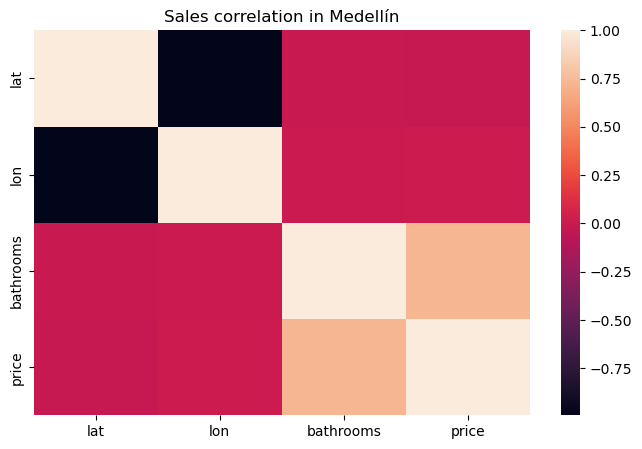

0    11309
3     5895
5      996
Name: bathroom_range, dtype: int64
....


C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


Accuracy: 0.5340659340659341


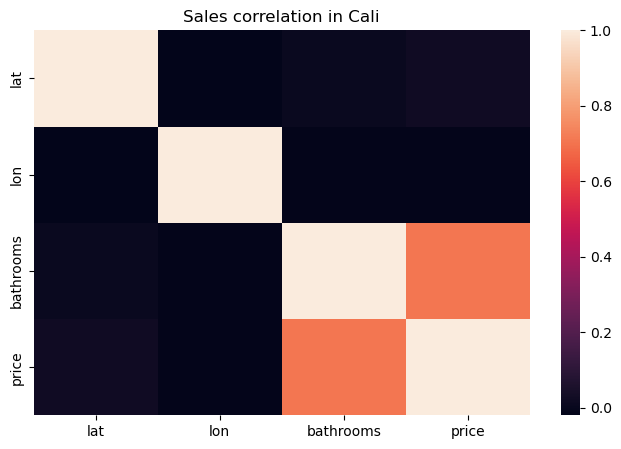

0    14806
3     7271
5     1067
Name: bathroom_range, dtype: int64
....


C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


Accuracy: 0.6094188809678116


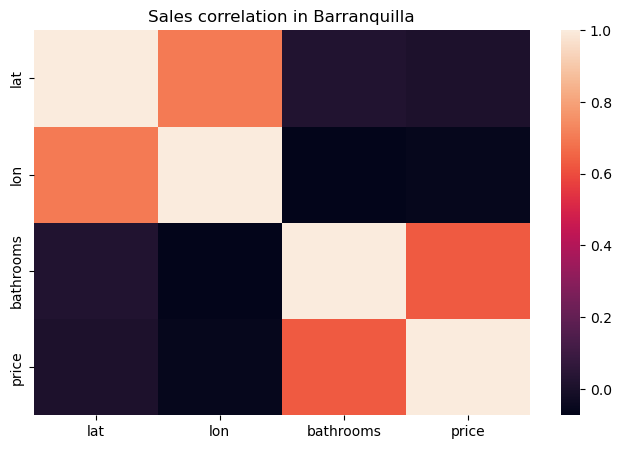

0    10966
3     6084
5      671
Name: bathroom_range, dtype: int64
....


C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


Accuracy: 0.5433004231311707


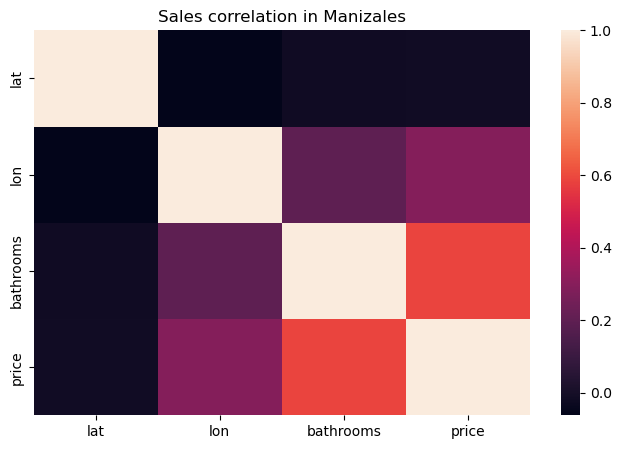

0    10273
3     1759
5       55
Name: bathroom_range, dtype: int64
....


C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


Accuracy: 0.5789909015715468


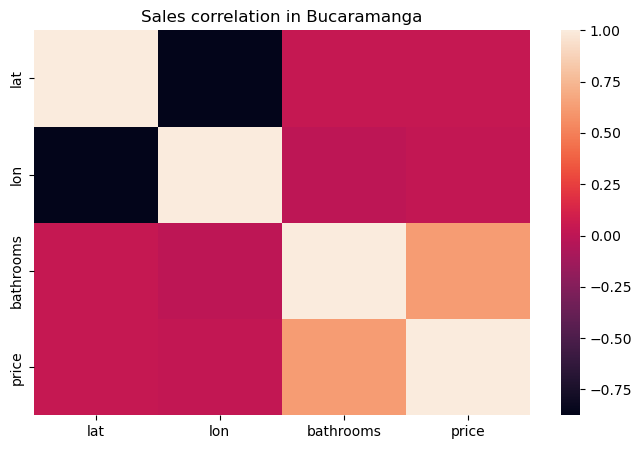

0    5081
3    1281
5      87
Name: bathroom_range, dtype: int64
....


C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


Accuracy: 0.6573643410852713


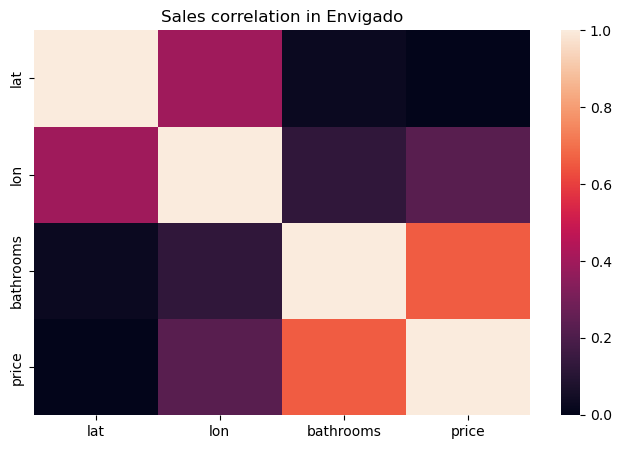

0    3154
3    1723
5     188
Name: bathroom_range, dtype: int64
....


C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


Accuracy: 0.6347482724580454


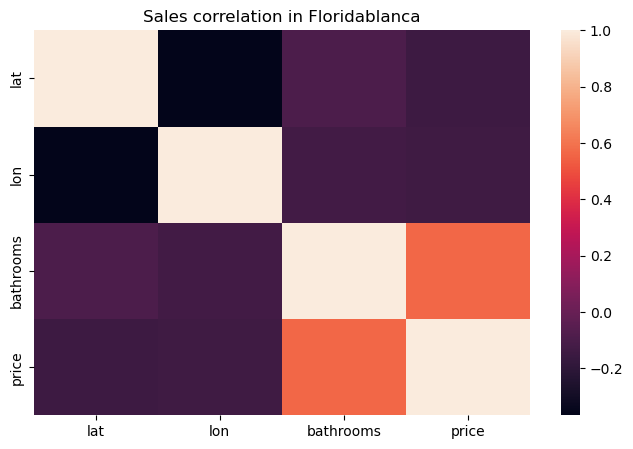

0    1767
3     292
5       6
Name: bathroom_range, dtype: int64
....
Accuracy: 0.774818401937046


C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


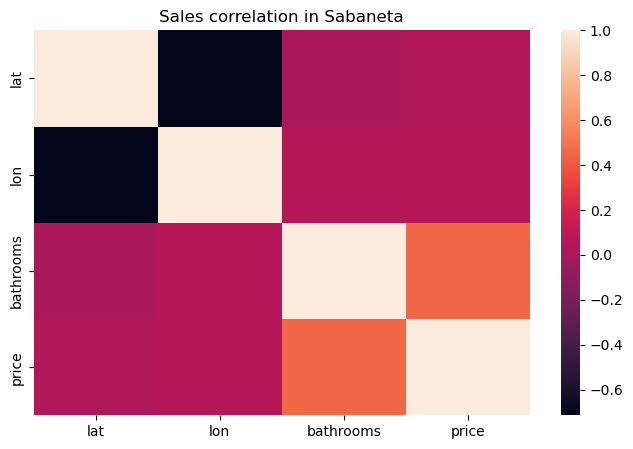

C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


0    2156
3     303
5      37
Name: bathroom_range, dtype: int64
....
Accuracy: 0.79


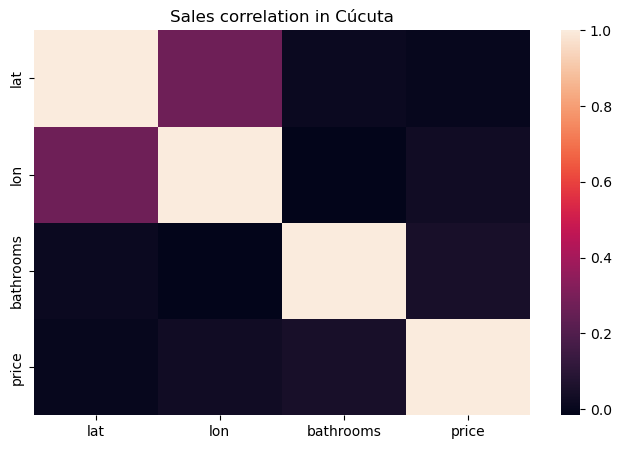

0    2255
3    1035
5      60
Name: bathroom_range, dtype: int64
....
Accuracy: 0.564179104477612


C:\Users\afrincon\AppData\Local\Temp\ipykernel_15672\382439001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)


In [14]:
for city in cities:
    sales_data_city=sales_data[sales_data["l3"]==city]
    corr=sales_data_city.corr ()
    # plot the heatmap
    plt.rcParams["figure.figsize"] = (8,5)
    plt.title("Sales correlation"+" in "+ city)
    sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
    plt.show()
    X = sales_data_city[["price"]]
    y = sales_data_city["bathrooms"]
    # Define the range bins
    bins = [-0.1, 2.1, 4.1, 10000]
    labels=[0,3,5]
    # Create a new column "bathroom_range" and assign it the values of the corresponding bin
    sales_data_city['bathroom_range'] = pd.cut(sales_data_city["bathrooms"], bins=bins,labels=labels)
    y=sales_data_city["bathrooms"]
    # Display the counts of each bin
    print(sales_data_city['bathroom_range'].value_counts()) 
    X=X.values
    y=y.values
    X = min_max_scaler.fit_transform(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("....")
    # Train a SVM model
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # Predict on the testing set and calculate the accuracy
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    print("Accuracy:", accuracy)

#### Check null values

In [15]:
null_values=data.isnull().sum()/len(data)*100
null_values.sort_values()



id                  0.0000
property_type       0.0000
l2                  0.0000
l1                  0.0000
operation_type      0.0000
end_date            0.0000
start_date          0.0000
ad_type             0.0000
created_on          0.0000
title               0.0012
price               0.0509
currency            0.0550
description         0.0644
l3                  6.2812
bathrooms          20.0507
lon                25.9718
lat                25.9719
bedrooms           62.3954
l4                 72.6005
rooms              82.7913
l5                 84.0873
price_period       87.8833
surface_covered    94.0091
l6                 94.5253
surface_total      95.8758
dtype: float64

In [16]:
percetage_50=[]
for column in null_values.index:
    if null_values[column]>50:
        print(column, null_values[column])
        percetage_50.append(column)
data=data.drop(columns=percetage_50)
data

l4 72.6005
l5 84.0873
l6 94.5253
rooms 82.7913
bedrooms 62.3954
surface_total 95.8758
surface_covered 94.0091
price_period 87.88329999999999


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.921000,-76.506000,Colombia,Valle del Cauca,NaN,7.0,1.300000e+09,COP,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,7.0,2.800000e+09,COP,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.357700,-76.541811,Colombia,Valle del Cauca,Cali,7.0,2.800000e+09,COP,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.364000,-76.538000,Colombia,Valle del Cauca,Cali,8.0,3.500000e+09,COP,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.391000,-76.517000,Colombia,Valle del Cauca,Cali,9.0,4.800000e+08,COP,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,7.000000e+05,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,7.000000e+05,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999997,NEIrzJXLpHqPDIXwD+9r8w==,Propiedad,2021-03-31,2021-05-07,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,1.0,7.000000e+05,COP,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999998,fpxqXlGPqDwKhuZVQGxCPA==,Propiedad,2021-03-31,9999-12-31,2021-03-31,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,4.0,7.000000e+08,COP,Casa en venta La Castellana,<b>Casa en venta La Castellana</b><br><br>Herm...,Casa,Venta


In [17]:
data["created_on"].value_counts()

2020-08-27    13627
2020-07-27    10260
2020-09-25     9807
2021-02-15     9578
2021-02-16     9186
              ...  
2021-07-18      181
2021-08-15      167
2021-06-20      149
2021-07-04      122
2021-06-13      113
Name: created_on, Length: 371, dtype: int64

In [18]:
data["operation_type"].value_counts()

Venta                571884
Arriendo             427736
Arriendo temporal       380
Name: operation_type, dtype: int64

In [19]:
data["currency"].value_counts()

COP    999402
USD        43
ARS         5
Name: currency, dtype: int64

In [20]:
data["property_type"].value_counts()

Apartamento        565404
Casa               220101
Otro               111046
Lote                46369
Local comercial     26389
Oficina             22258
Finca                6725
Depósito             1544
Parqueadero           164
Name: property_type, dtype: int64

In [21]:
data=data[(data["currency"]!="ARS") & (data["currency"]!="USD")]
data["currency"].value_counts()

COP    999402
Name: currency, dtype: int64

In [22]:
cities=data["l3"].value_counts()[:10].index.to_list()
cities

['Medellín',
 'Bogotá D.C',
 'Cali',
 'Barranquilla',
 'Bucaramanga',
 'Manizales',
 'Envigado',
 'Cúcuta',
 'Pereira',
 'Floridablanca']

In [23]:
data = data[data["l3"].isin(data["l3"].value_counts()[:10].index)]
data= data.dropna(how='any')
sales_data=data[(data["operation_type"]=="Venta") & (data["property_type"]=="Apartamento")]
rent_data=data[(data["operation_type"]=="Arriendo") & (data["property_type"]=="Apartamento")]

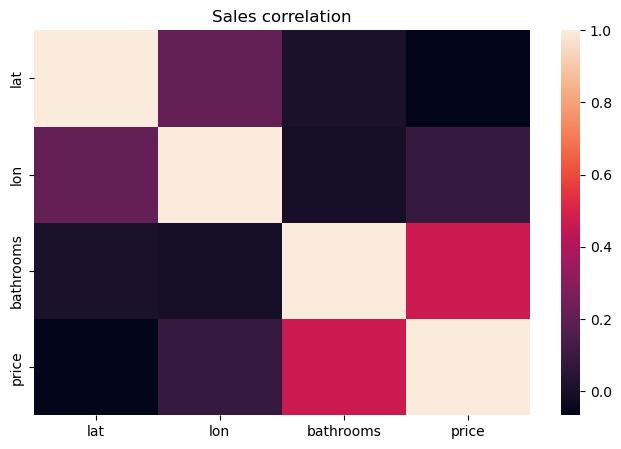

In [24]:
corr=sales_data.corr ()
# plot the heatmap
plt.rcParams["figure.figsize"] = (8,5)
plt.title("Sales correlation")
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

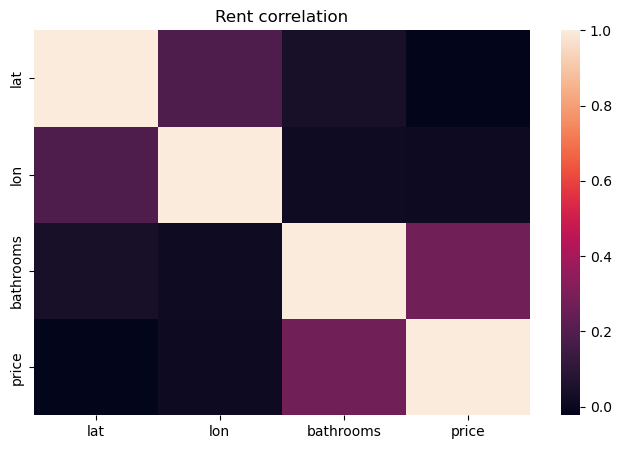

In [25]:
corr=rent_data.corr ()
# plot the heatmap
plt.rcParams["figure.figsize"] = (8,5)
plt.title("Rent correlation")
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

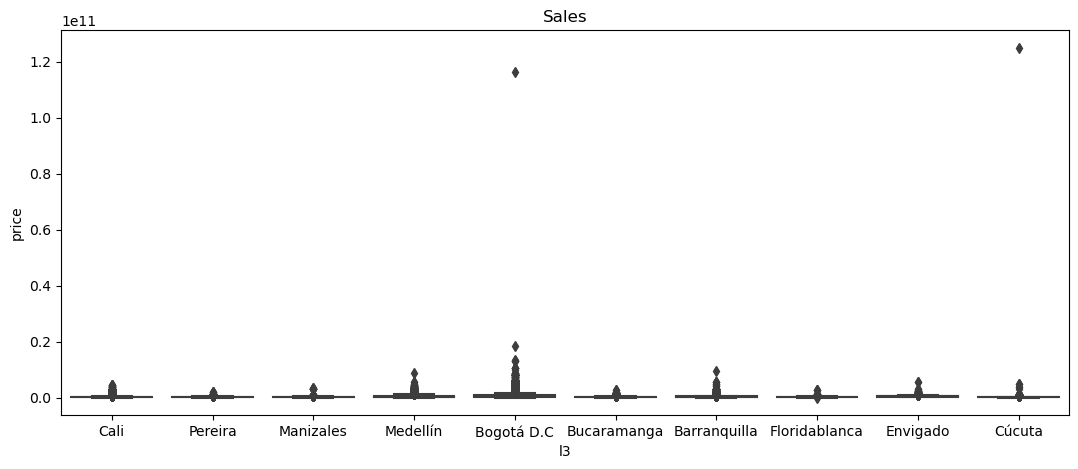

In [26]:
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales")
sns.boxplot(x='l3', y='price', data=sales_data)
plt.show()

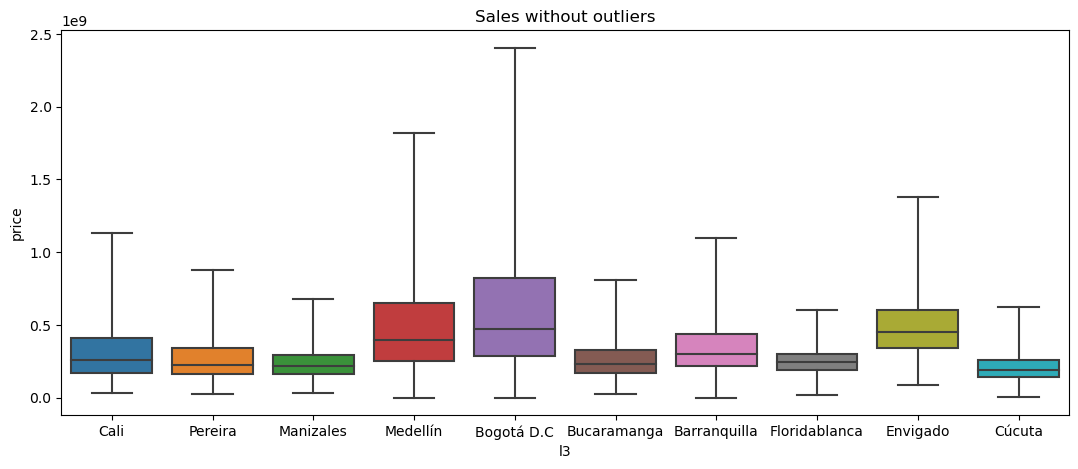

In [27]:
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales without outliers")
sns.boxplot(x='l3', y='price', data=sales_data, whis=3, sym='')
plt.show()

In [28]:
sales_bogota=sales_data[sales_data["l3"]=="Bogotá D.C"]

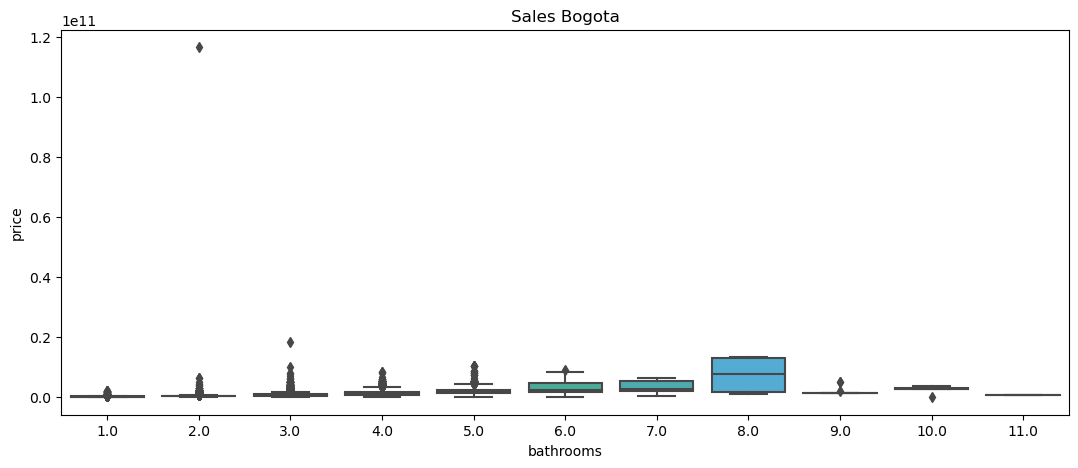

In [29]:
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales Bogota")
sns.boxplot(x='bathrooms', y='price', data=sales_bogota)
plt.show()

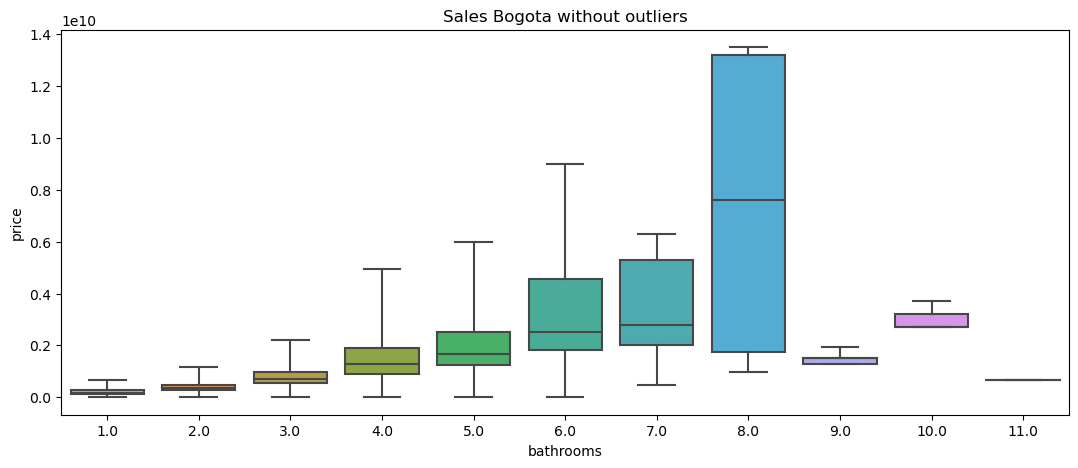

In [30]:
plt.rcParams["figure.figsize"] = (13,5)
plt.title("Sales Bogota without outliers")
sns.boxplot(x='bathrooms', y='price', data=sales_bogota, whis=3, sym='')
plt.show()

In [31]:
X = sales_bogota[["bathrooms"]]
y = sales_bogota['price']

X = X.to_numpy()
y = y.to_numpy()

import statsmodels.api as sm

# Add a column of ones to X to represent the intercept term
X = sm.add_constant(X)

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Print the coefficients
print('Coefficients:', coefficients)

# Create a model and fit it to the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Coefficients: [-4.70323739e+08  4.73721813e+08]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                 1.883e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:58:15   Log-Likelihood:            -9.8031e+05
No. Observations:               44767   AIC:                         1.961e+06
Df Residuals:                   44765   BIC:                         1.961e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

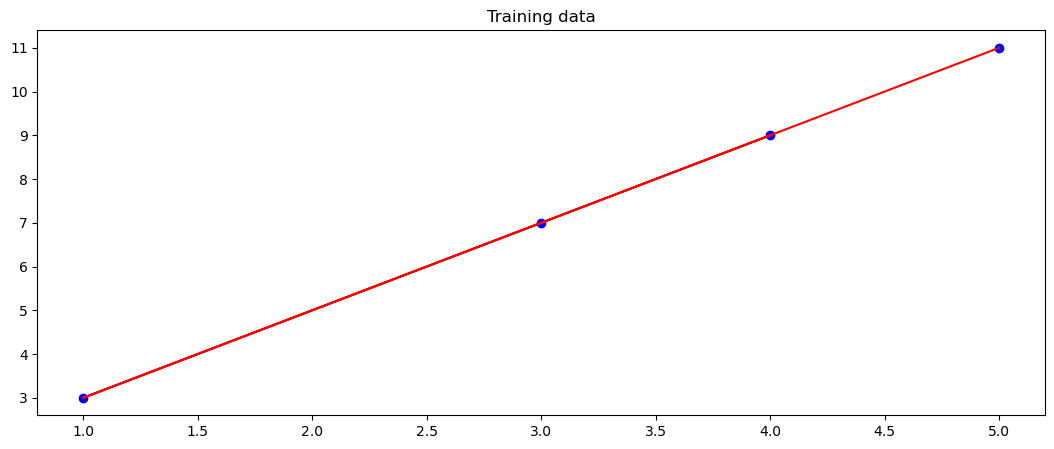

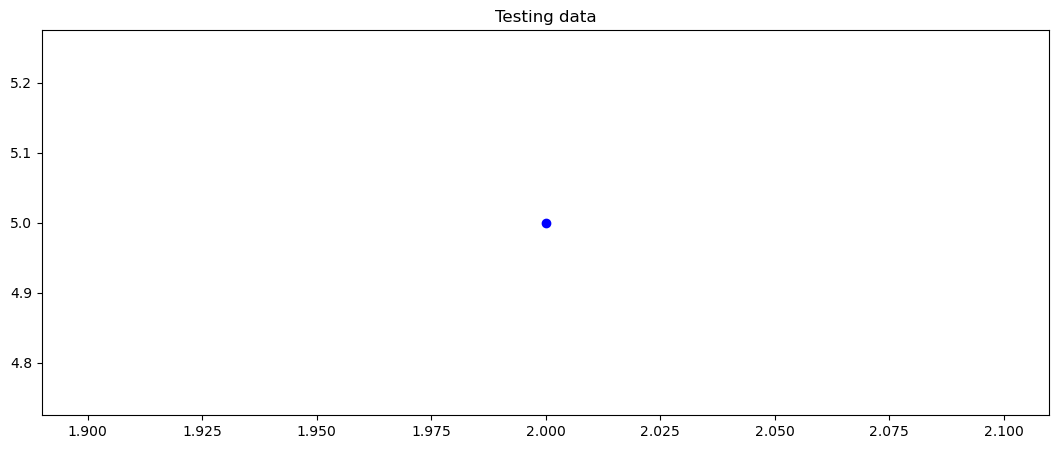

MSE on training data:  4.437342591868191e-31
MSE on testing data:  7.888609052210118e-31


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create some example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])

# Reshape the data to fit the linear regression model
x = x.reshape(-1, 1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the linear regression object
reg = LinearRegression()

# Fit the training data to the model
reg.fit(x_train, y_train)

# Get the predictions for the training and testing data
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

# Calculate the mean squared error of the model on the training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Plot the training data and the linear regression line
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, y_train_pred, color='red')
plt.title('Training data')
plt.show()

# Plot the testing data and the linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_test_pred, color='red')
plt.title('Testing data')
plt.show()

# Print the mean squared error of the model on the training and testing data
print('MSE on training data: ', mse_train)
print('MSE on testing data: ', mse_test)

[0.59762497] [-1.60975078 -1.11913886  1.00000349]


IndexError: index 1 is out of bounds for axis 1 with size 1

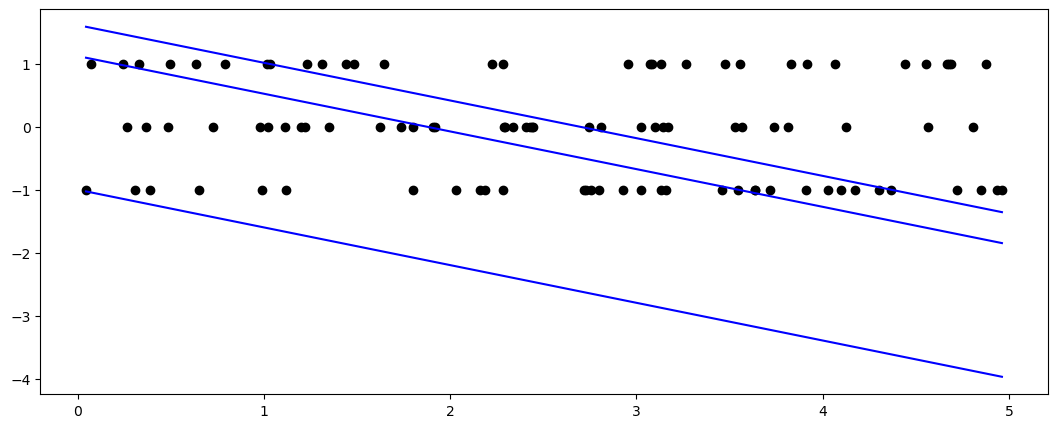

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate some sample data
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.where(X > 2.5, 1, -1)
y = np.random.randint(-1,2, size=100)
# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get the support vectors
sv = clf.support_vectors_
# Get the coefficients of the decision function
w = clf.coef_[0]
b = clf.intercept_
print(w,b)
# Create a plot of the decision boundary and the support vectors
plt.scatter(X, y, color='black')
plt.plot(X, -(w[0]*X + b), color='blue')
plt.scatter(sv[:,0], sv[:,1], color='red')
plt.xlabel('X')
plt.ylabel('Class')
plt.show()